In [92]:
using VAMP
using Interact

In [93]:
parameters = Dict()

include("../test/domain_robot.jl")
include("../test/domain_world2.jl")

make_domain_world2 (generic function with 1 method)

In [94]:
make_robot(parameters)
make_robot_vis_target(parameters)
make_domain_world2(parameters)

In [95]:
let
    @setparam parameters tx__Frobot__Fcamerabase = nothing
    @setparam parameters poly_frustum__Fcamera = nothing
    @setparam parameters all_view__Fcamerabase = nothing
    @setparam parameters polys_obstacles__Fworld = nothing
    @setparam parameters points_robot__Frobot = nothing

    camera = PanSteerableCamera(tx__Frobot__Fcamerabase, poly_frustum__Fcamera)
    potential_camera = VAMP.PotentialCamera(camera, all_view__Fcamerabase)

    visibility_instance = VisibilityInstance(
        Set(points_robot__Frobot),
        polys_obstacles__Fworld,
        potential_camera,
        q->UnionOfConvex([]));
    @setparam parameters visibility_instance
end;

In [96]:
include("../test/domain_motion_planning_collision.jl")

is_path_free (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(115: "input-47" = 2.0 Float64 , "x", 2.0, "2.0", 21, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(0.6=>"0.6",3.4=>"3.4",0.3=>"0.3",1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",3.6=>"3.6",3.8=>"3.8",1.5=>"1.5",2.2=>"2.2"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(117: "input-48" = 3.5 Float64 , "y", 3.5, "3.5", 36, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(1.2=>"1.2",4.3=>"4.3",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",6.2=>"6.2",0.2=>"0.2",6.7=>"6.7",3.5=>"3.5",6.1=>"6.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(119: "input-49" = 180.0 Float64 , "θ", 180.0, "180.0", 37, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"5.0"=>5.0,"10.0"=>10.0,"15.0"=>15.0,"20.0"=>20.0,"25.0"=>25.0,"30.0"=>30.0,"35.0"=>35.0,"40.0"=>40.0,"45.0"=>45.0…), Dict(210.0=>"210.0",275.0=>"275.0",360.0=>"360.0",85.0=>"85.0",215.0=>"215.0",160.0=>"160.0",25.0=>"25.0",55.0=>"55.0",170.0=>"170.0",155.0=>"155.0"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Bool}(121: "input-50" = false Bool , "dovis", false, "false", 1, Interact.OptionDict(DataStructures.OrderedDict("false"=>false,"true"=>true), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

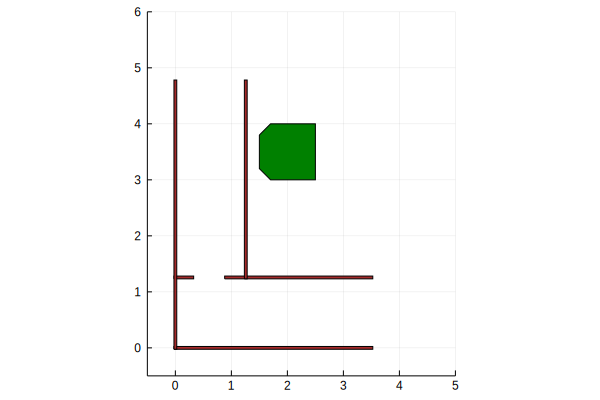

In [97]:
@setparam parameters polys_robot__Frobot = nothing
@setparam parameters visibility_instance = nothing
@setparam parameters cspace_collision = nothing
@setparam parameters polys_obstacles__Fworld = nothing

global_q = nothing
robot = polys_robot__Frobot
#robot = arm_robot
@manipulate for x = 0.0:0.1:4.0, y = 0.0:0.1:7.0, θ = 0.0:5.0:360.0, dovis = [false, true]
    global global_q
    #q = ArmRobot_MPState{1.0, 1.0}(x, y, deg2rad(θ), deg2rad(armθ))
    q = SE2_MPState{1.0}(x, y, deg2rad(θ))
    global_q = q
    plt = Plots.plot(;aspect_ratio=1.0, xlim=(-0.5,5), ylim=(-0.5, 6))
    
    if dovis
        for p in explicit(VAMP.get_visible_region__Fworld(visibility_instance, q), 15).pieces
            plot_polyhedron!(plt, p, fillcolor=:yellow, linealpha=0.0)
        end
    end
    
    
    for p in get_robot__Fworld(robot, q).pieces
        plot_polyhedron!(plt, p, fillcolor=if cspace_collision(q); :red else :green end)
    end
    
    for p in polys_obstacles__Fworld.pieces
        plot_polyhedron!(plt, p, fillcolor=:brown)
    end
    plt
end

In [98]:
sequence = [
  SE2_MPState{1.0}(2.7,0.6,deg2rad(180.0)),
  SE2_MPState{1.0}(0.6,0.6,deg2rad(90.0)),
  SE2_MPState{1.0}(0.6,5.4,deg2rad(270.0)),
  SE2_MPState{1.0}(0.6,2.5,deg2rad(90.0))
]

4-element Array{VAMP.SE2MotionPlanningState{1.0,Float64},1}:
 SE2_MPState{1.0}(2.7,0.6,deg2rad(180.0))
 SE2_MPState{1.0}(0.6,0.6,deg2rad(90.0)) 
 SE2_MPState{1.0}(0.6,5.4,deg2rad(270.0))
 SE2_MPState{1.0}(0.6,2.5,deg2rad(90.0)) 

In [99]:
# push!(sequence, global_q)

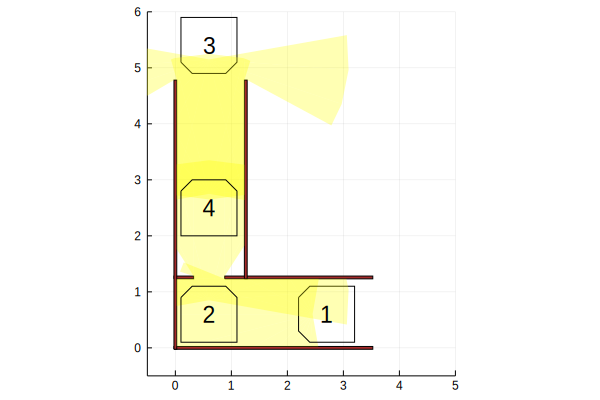

In [100]:
plt = Plots.plot(;aspect_ratio=1.0, xlim=(-0.5,5), ylim=(-0.5, 6))
for p in polys_obstacles__Fworld.pieces
    plot_polyhedron!(plt, p, fillcolor=:brown)
end

for (i, q) in enumerate(sequence)
    for p in explicit(VAMP.get_visible_region__Fworld(visibility_instance, q), 15).pieces
        plot_polyhedron!(plt, p, fillcolor=:yellow, linealpha=0.0, fillalpha=0.3)
    end

    for p in get_robot__Fworld(robot, q).pieces
        plot_polyhedron!(plt, p, fillalpha=0.0)
    end
    
    Plots.annotate!(plt, q.e.q[1], q.e.q[2], Plots.text("$i", 16, :black, :center))
end
plt

In [101]:
visibility_instance.get_robot_occluders__Fworld

(::#115) (generic function with 1 method)